In [1]:
import networkx as nx


In [29]:
number_of_nodes = 1000
#m : Number of edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(n = number_of_nodes, m = 5)


In [30]:
import random
from nxsim import BaseNetworkAgent


In [38]:
class Player(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=0, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        self.bite_prob = 0.05

    def run(self):
        while True:
            if self.state['id'] == 1:
                self.zombify()
                yield self.env.timeout(1)
            else:
                yield self.env.event()

    def zombify(self):
        normal_neighbors = self.get_neighboring_agents(state_id=0)
        for neighbor in normal_neighbors:
            if random.random() < self.bite_prob:
                neighbor.state['id'] = 1  # zombie
                print(self.env.now, self.id, neighbor.id, sep='\t')
                break
                

In [39]:
from nxsim import NetworkSimulation

#Initial state: everyone is normal.
init_states = [{'id': 0,} for _ in range(number_of_nodes)]

#Seed a zombie
init_states[5]  = {'id':1}
sim = NetworkSimulation(topology = G, states = init_states, agent_type = Zombie, max_time = 30, num_trials = 1, logging_interval = 1)



In [40]:
sim.run_simulation()


Starting simulations...
---Trial 0---
Setting up agents...
0	5	120
1	5	229
2	5	0
3	5	4
4	5	12
5	5	33
6	5	11
7	5	186
8	5	8
9	5	14
10	5	197
11	5	175
11	120	43
12	5	260
12	120	588
13	5	192
14	5	617
15	5	22
16	5	19
16	120	6
17	5	3
18	5	2
19	5	691
20	5	178
21	5	248
21	120	17
22	5	96
22	120	15
23	5	113
24	5	31
25	5	397
26	5	386
27	5	162
29	5	622
Written 30 items to pickled binary file: sim_01/log.0.state.pickled
Simulation completed.


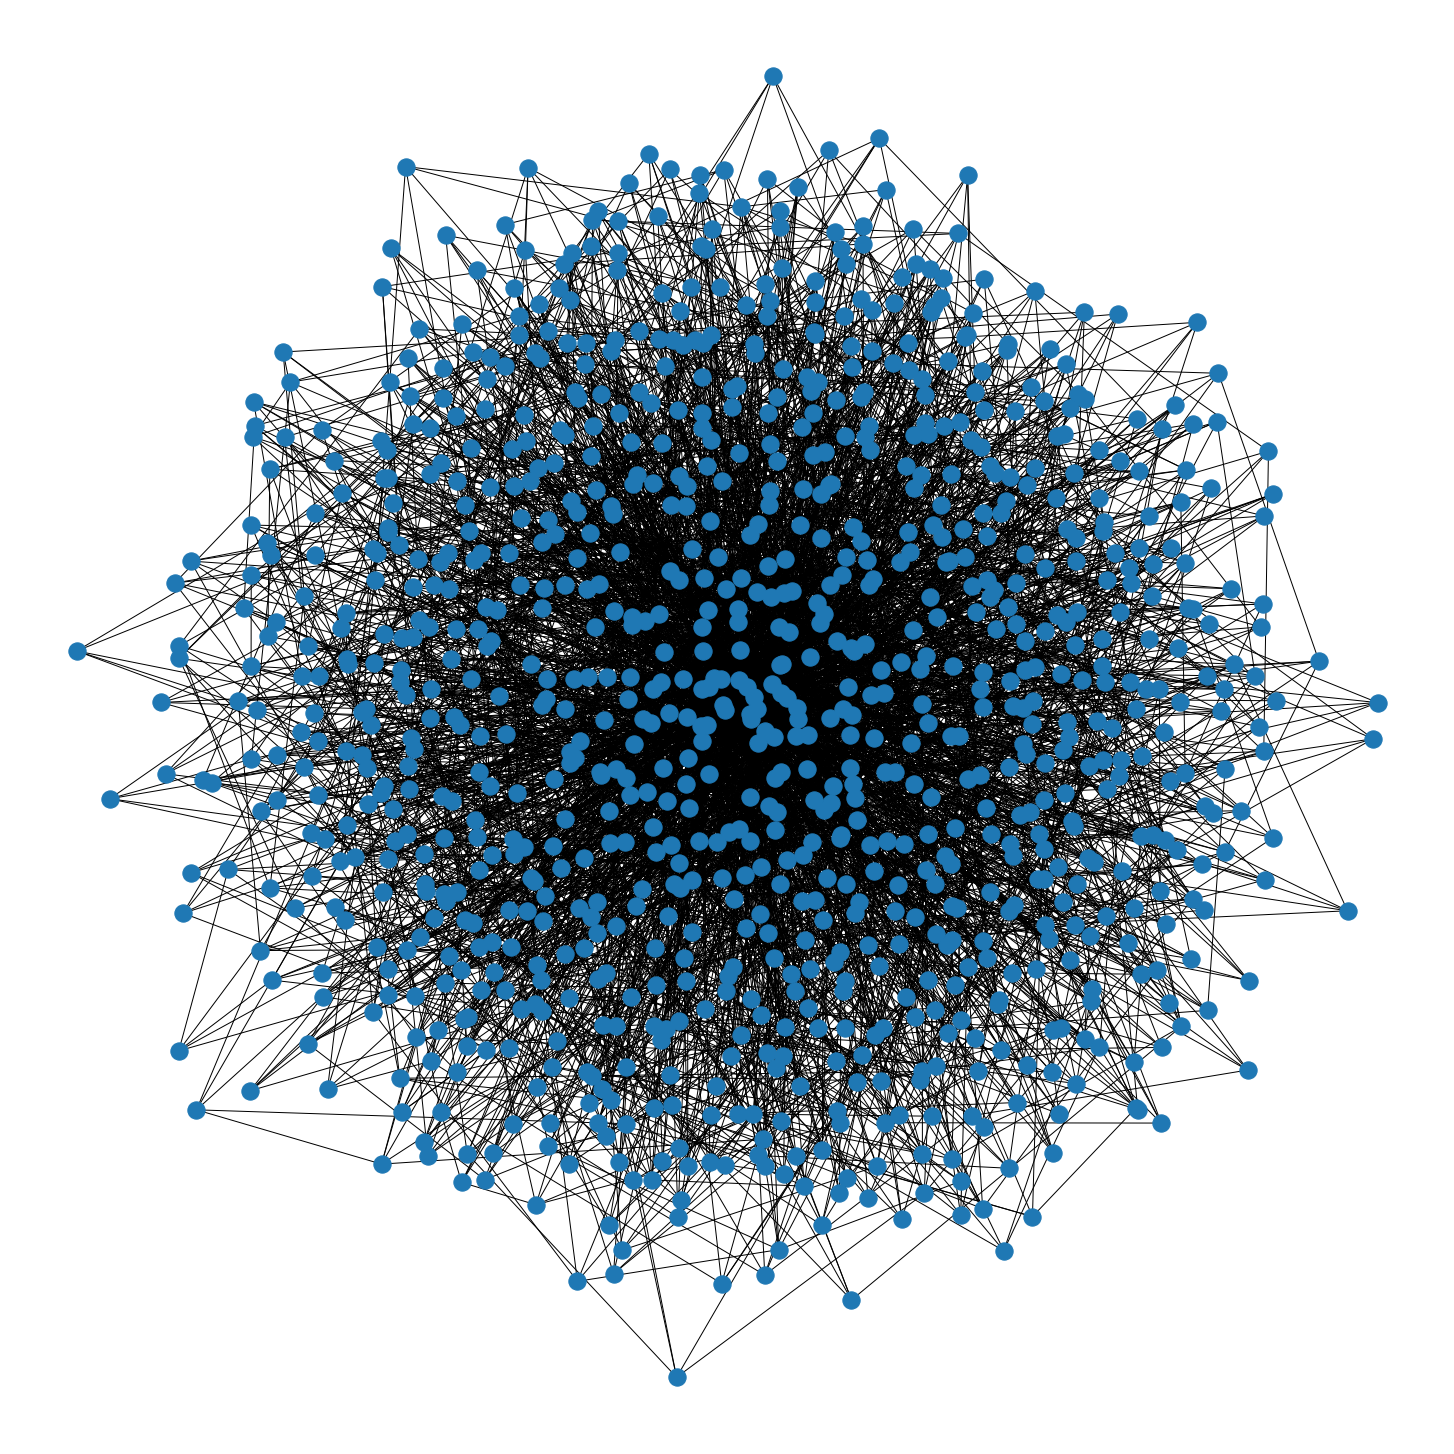

In [41]:
%matplotlib inline
plt.figure(figsize = (20,20))
nx.draw(G)


In [42]:
from nxsim import BaseLoggingAgent
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)


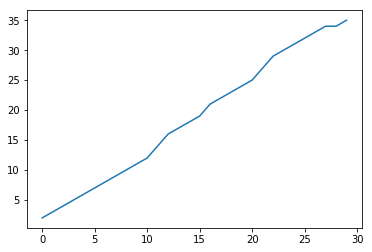

In [43]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
zombie_census = [sum([1 for node_id, state in g.items() if state['id'] == 1]) for t,g in trial.items()]
plt.plot(zombie_census)
